In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('Utils/')
from Inverse_Util import inverse_obj, draw_this, inv_error
from Image_Util import rgb2gray, gray2bw, img2arr, noise, res2heatmap
from Inverse_CG_Util import CG_FEM_solver, CG_ROM_solver
import numpy as np
import pandas as pd
import matplotlib as plt
from ngsolve import *
from ngsolve.webgui import Draw
import time

plt.rc('xtick', labelsize=12)  
plt.rc('ytick', labelsize=16)
%reload_ext autoreload

importing NGSolve-6.2.2203


In [10]:
def plot_func(sz, xs, ys, islog = False, title = None,
              xlab = None, ylab = None, leg = None, scatter = False, 
              c = None):
    '''plots ys v. xs = [x1s, x2s, ...], ys = [y1, y2, ...]'''
    '''leg = [legend1, legend2, ...]'''
    plt.figure(figsize = sz)
    
    if islog:
        x_ = np.log(x)
    
        for y in ys:
            if scatter:
                for x in xs:
                    if c != None:
                        plt.scatter(x, y, s = 50, c = c, alpha=0.5)
                    else:
                        plt.scatter(x, y, s = 50, alpha=0.5)
            else:
                for x in xs:
                    plt.plot(x, y, linewidth = 2)
    else:
        for y in ys:
            if scatter:
                for x in xs:
                    if c != None:
                        plt.scatter(x, y, s = 50, c = c, alpha=0.5)
                    else:
                        plt.scatter(x, y, s = 50, alpha=0.5)
            else:
                for x in xs:
                    plt.pl(x, y, linewidth = 2)

    plt.xlabel(xlab, fontsize = 14)
    plt.ylabel(ylab, fontsize = 14)
    plt.legend(leg, loc=0, fontsize=16)
    plt.title(title, fontsize=18)
    

In [3]:
nn = [2**5, 2**6, 2**7, 2**8]      #1/2^5 - 1/2^8
#nn = [2**9]
lams = [1e-4,1e-5,1e-6,1e-7,1e-8]
#tols = [1e-6,1e-7,1e-8,1e-9,1e-10]
tols = [1e-4,1e-5,1e-6,1e-7,1e-8]
#colnames =  ['h^-1','lam','tol','ite','time','err']
colnames_all =  ['h','lam','tol','ite_f','ite_r','time_f','time_r',
                 'err_f','err_r','err_comp']
sqxN = 3
rowl = len(nn)*len(lams)*len(tols)
#coll = np.zeros((rowl,len(colnames)))
col_all = np.zeros((rowl,len(colnames_all))) 
#f0 = img2arr(path, checkGray = False, checkBw = False)
f0 = sin(pi*x)*sin(pi*y)
Xs = []
for i in range(len(nn)):
    path = "Letters/CMU3{}.png".format(nn[i])
    sou = img2arr(path, checkGray = False, checkBw = False, sqxN = sqxN)
    X = inverse_obj(h = 1/nn[i], order = 1, dim = 1, boundary = "bottom|left|right|top", 
                    T = 1, dt = 1/nn[i], u0 = 0, source = sou, sqr = True)
    X.get_mesh(sqxN=sqxN)
    out_tmp = X.solve_fem(save = True)
    out = noise(out_tmp,level = 0.1, std = 1e-3)
    X.fem_uT = out
    Xs.append(X)
print('Xs initialization completed')

mesh size:  (96, 32)
mesh size:  (192, 64)
mesh size:  (384, 128)
mesh size:  (768, 256)
Xs initialization completed


# Letter Test

In [4]:
for i in range(len(nn)):
    path = "Letters/CMU3{}.png".format(nn[i])
    tmpsou = img2arr(path, checkGray = False, checkBw = False)
    for j in range(len(lams)):
        for l in range(len(tols)):
            res0, k0, tm0 = CG_FEM_solver(Xs[i], f0, lam = lams[j], 
                                          tol2 = tols[l], ite = True)
            err0 = inv_error(Xs[i], tmpsou, res0)
            
            res1, k1, tm1 = CG_ROM_solver(Xs[i], f0, lam = lams[j], 
                                          tol2 = tols[l], ite = True)
            err1 = inv_error(Xs[i], tmpsou, res1)
            
            err_c = inv_error(Xs[i], res0, res1)

            '''col:  
            1/h | lam | tol | ite_f | ite_r | tm_f | tm_r | err_f | err_r | err_c'''
            #pack0 = [nn[i],lams[j],tols[l],k0,tm0,err0]
            pack_all = [nn[i],lams[j],tols[l],k0,k1,tm0,tm1,err0,err1,err_c]
            ind = i*len(lams)*len(tols)+j*len(tols)+l
            #coll[ind, :] = np.array(pack0)
            col_all[ind, :] = np.array(pack_all)
            print('\nnum: ',(j,l))
            print('##### {}/{} #####\n'.format(ind+1,rowl))
        l = 0
    j = 0




CG-stdFEM used 0.523015022277832 sec
used 4 iterations

CG-ROM used 0.21019911766052246 sec
used 5 iterations

num:  (0, 0)
##### 1/100 #####


CG-stdFEM used 0.8910210132598877 sec
used 7 iterations

CG-ROM used 0.26158809661865234 sec
used 8 iterations

num:  (0, 1)
##### 2/100 #####


CG-stdFEM used 1.4873709678649902 sec
used 12 iterations

CG-ROM used 0.4222548007965088 sec
used 15 iterations

num:  (0, 2)
##### 3/100 #####


CG-stdFEM used 1.7578048706054688 sec
used 14 iterations

CG-ROM used 0.537208080291748 sec
used 20 iterations

num:  (0, 3)
##### 4/100 #####


CG-stdFEM used 2.2512311935424805 sec
used 18 iterations

CG-ROM used 0.6474199295043945 sec
used 25 iterations

num:  (0, 4)
##### 5/100 #####


CG-stdFEM used 0.6359329223632812 sec
used 5 iterations

CG-ROM used 0.2272169589996338 sec
used 6 iterations

num:  (1, 0)
##### 6/100 #####


CG-stdFEM used 1.3766217231750488 sec
used 11 iterations

CG-ROM used 0.45851683616638184 sec
used 16 iterations

num:  (1, 1)
##

no more timer available, reusing last one


k,error =  (450, 1.0142281857943684e-07)
k,error =  (500, 1.1933954180958478e-07)
k,error =  (550, 1.0700497470039948e-07)
k,error =  (600, 7.325833014486738e-08)
k,error =  (650, 3.1097202640793403e-08)
k,error =  (700, 9.632915646306257e-08)

CG-stdFEM used 92.9457859992981 sec
used 744 iterations
k,error =  (50, 3.6648999198580415e-06)
k,error =  (100, 4.853708307817192e-06)
k,error =  (150, 6.93170971152058e-06)
k,error =  (200, 1.8884513454870742e-06)
k,error =  (250, 3.3337310406833306e-06)
k,error =  (300, 6.906482885296111e-06)
k,error =  (350, 2.171234638700287e-06)
k,error =  (400, 2.0545804551590056e-06)
k,error =  (450, 3.9801103630748995e-06)
k,error =  (500, 6.283078073859628e-07)
k,error =  (550, 6.844481079542671e-07)
k,error =  (600, 1.2257738667074924e-06)
k,error =  (650, 3.473037363421547e-07)
k,error =  (700, 9.272307227443504e-07)
k,error =  (750, 1.0201436167974591e-07)
k,error =  (800, 2.8455680053895403e-07)
k,error =  (850, 2.497962995635032e-07)
k,error =  (9

k,error =  (750, 1.3587171088551547e-06)
k,error =  (800, 4.969277224889879e-07)
k,error =  (850, 6.167877598549894e-07)
k,error =  (900, 2.852049773887482e-07)
k,error =  (950, 3.5001202814422493e-07)
k,error =  (1000, 1.7349776804078452e-07)
k,error =  (1050, 1.0907633033291158e-07)
k,error =  (1100, 1.6919624427398643e-07)
k,error =  (1150, 3.224437071158553e-08)
k,error =  (1200, 6.478818694982561e-08)

CG-ROM used 128.68312287330627 sec
used 1224 iterations

num:  (4, 4)
##### 50/100 #####


CG-stdFEM used 31.36488389968872 sec
used 3 iterations

CG-ROM used 7.074316740036011 sec
used 4 iterations

num:  (0, 0)
##### 51/100 #####


CG-stdFEM used 62.0375280380249 sec
used 6 iterations

CG-ROM used 8.4979829788208 sec
used 7 iterations

num:  (0, 1)
##### 52/100 #####


CG-stdFEM used 113.69410490989685 sec
used 11 iterations

CG-ROM used 11.84322476387024 sec
used 14 iterations

num:  (0, 2)
##### 53/100 #####


CG-stdFEM used 175.3188419342041 sec
used 17 iterations

CG-ROM used 


CG-ROM used 93.72257709503174 sec
used 20 iterations

num:  (0, 3)
##### 79/100 #####


CG-stdFEM used 2007.1048939228058 sec
used 19 iterations

CG-ROM used 103.74286603927612 sec
used 24 iterations

num:  (0, 4)
##### 80/100 #####


CG-stdFEM used 315.40533900260925 sec
used 3 iterations

CG-ROM used 60.60907006263733 sec
used 4 iterations

num:  (1, 0)
##### 81/100 #####


CG-stdFEM used 851.5747592449188 sec
used 8 iterations

CG-ROM used 72.93691182136536 sec
used 10 iterations

num:  (1, 1)
##### 82/100 #####


CG-stdFEM used 1804.2767679691315 sec
used 17 iterations

CG-ROM used 108.4066071510315 sec
used 27 iterations

num:  (1, 2)
##### 83/100 #####


CG-stdFEM used 2970.0333371162415 sec
used 28 iterations

CG-ROM used 145.47273588180542 sec
used 45 iterations

num:  (1, 3)
##### 84/100 #####


CG-stdFEM used 4675.258748054504 sec
used 44 iterations
k,error =  (50, 5.0965690733830086e-08)

CG-ROM used 173.68171501159668 sec
used 59 iterations

num:  (1, 4)
##### 85/100 #####

In [6]:
cg_l = dict()
for i in range(len(colnames_all)):
    #cg_l[colnames[i]] = coll[:,i]
    cg_l[colnames_all[i]] = col_all[:,i]
cg_l_df = pd.DataFrame(data = cg_l)
cg_l_df.to_csv('cg_CMU3_All_df.csv')

# Reguar Time Test

In [4]:
#hyperparameters
lam_s = [10**(-i) for i in range(4,9)]  #10^-4 - 10^-8
tol_s = [10**(-i) for i in range(6,11)]  #10^-6 - 10^-10

#special data containers
bf_diff = []; bfcg_fem_diff = []; bfcg_rom_diff = []; cg_diff = []
#main data containers
#method = ['bf_fem','bf_rom','cg_fem','cg_rom']
bf_fem = dict(); bf_rom = dict(); cg_fem = dict(); cg_rom = dict()

colnames =  ['h','lam','tol','ite','time','err']
rows = len(h_s)*len(lam_s)*len(tol_s)
cols = [np.zeros((rows,len(colnames))) for i in range(4)]
#cols = [bf_fem,bf_rom,cg_fem,cg_rom]


In [5]:
#acquiring data, transform into dataframes
for i in range(len(h_s)):
    for j in range(len(lam_s)):
        for l in range(len(tol_s)):
            res0, k0, tm0 = BFGS_FEM_solver(X_obj_s[i], f0, 1, lam = lam_s[j], 
                                            tol2 = tol_s[l], ite = True, ite_num = 1000)
            res1, k1, tm1 = BFGS_ROM_solver(X_obj_s[i], f0, 1, lam = lam_s[j], 
                                            tol2 = tol_s[l], ite = True, ite_num = 1000)
            res2, k2, tm2 = CG_FEM_solver(X_obj_s[i], f0, lam = lam_s[j], withM = True, 
                                          tol2 = tol_s[l], ite = True)
            res3, k3, tm3 = CG_ROM_solver(X_obj_s[i], f0, lam = lam_s[j], withM = True, 
                                          tol2 = tol_s[l], ite = True)
            err0 = inv_error(X_obj_s[i], res0, Source)
            err1 = inv_error(X_obj_s[i], res1, Source)
            err2 = inv_error(X_obj_s[i], res2, Source)
            err3 = inv_error(X_obj_s[i], res3, Source)
            #col:  h | lam | tol | ite | time | err
            pack0 = [h_s[i],lam_s[j],tol_s[l],k0,tm0,err0]
            pack1 = [h_s[i],lam_s[j],tol_s[l],k1,tm1,err1]
            pack2 = [h_s[i],lam_s[j],tol_s[l],k2,tm2,err2]
            pack3 = [h_s[i],lam_s[j],tol_s[l],k3,tm3,err3]
            ind = i*len(lam_s)*len(tol_s)+j*len(tol_s)+l
            cols[0][ind, :] = np.array(pack0)  #bf_fem
            cols[1][ind, :] = pack1  #bf_rom
            cols[2][ind, :] = pack2  #cg_fem
            cols[3][ind, :] = pack3  #cg_rom
            print('\nnum: ',(i,j,l))
            print('##### {}/{} #####\n'.format(ind,rows))
            
        l = 0
    j = 0





QuasiN-stdFEM used 0.062191009521484375 sec
used 5 iterations

QuasiN-ROM used 0.03184366226196289 sec
used 5 iterations

CG-stdFEM used 0.029566049575805664 sec
used 4 iterations

CG-ROM used 0.015465974807739258 sec
used 4 iterations

num:  (0, 0, 0)
##### 0/200 #####


QuasiN-stdFEM used 0.052289724349975586 sec
used 5 iterations

QuasiN-ROM used 0.029931068420410156 sec
used 5 iterations

CG-stdFEM used 0.029456138610839844 sec
used 4 iterations

CG-ROM used 0.01600813865661621 sec
used 4 iterations

num:  (0, 0, 1)
##### 1/200 #####


QuasiN-stdFEM used 0.05413389205932617 sec
used 5 iterations

QuasiN-ROM used 0.029784202575683594 sec
used 5 iterations

CG-stdFEM used 0.03214406967163086 sec
used 4 iterations

CG-ROM used 0.014527082443237305 sec
used 4 iterations

num:  (0, 0, 2)
##### 2/200 #####


QuasiN-stdFEM used 0.0708930492401123 sec
used 7 iterations

QuasiN-ROM used 0.041330814361572266 sec
used 7 iterations

CG-stdFEM used 0.03803086280822754 sec
used 5 iterations

CG

k,error =  (100, 2.260553374353778e-05)

QuasiN-stdFEM used 0.982330322265625 sec
used 113 iterations
k,error =  (50, 0.006054693789046532)
k,error =  (100, 2.2517097764938717e-05)

QuasiN-ROM used 0.5600228309631348 sec
used 113 iterations

CG-stdFEM used 0.08758687973022461 sec
used 11 iterations

CG-ROM used 0.045357704162597656 sec
used 12 iterations

num:  (0, 5, 3)
##### 28/200 #####

k,error =  (50, 0.006121457740692819)
k,error =  (100, 2.260554554416397e-05)

QuasiN-stdFEM used 1.1182069778442383 sec
used 129 iterations
k,error =  (50, 0.006054693789046532)
k,error =  (100, 2.2517097764938717e-05)

QuasiN-ROM used 0.6344740390777588 sec
used 129 iterations

CG-stdFEM used 0.1123960018157959 sec
used 14 iterations

CG-ROM used 0.05884385108947754 sec
used 16 iterations

num:  (0, 5, 4)
##### 29/200 #####


QuasiN-stdFEM used 0.03445005416870117 sec
used 3 iterations

QuasiN-ROM used 0.020497798919677734 sec
used 3 iterations

CG-stdFEM used 0.021112918853759766 sec
used 3 itera

no more timer available, reusing last one



CG-ROM used 0.014386892318725586 sec
used 4 iterations

num:  (0, 7, 2)
##### 37/200 #####

k,error =  (50, 4.7395618010641536e-06)
k,error =  (100, 0.0001173920042846765)

QuasiN-stdFEM used 1.1843550205230713 sec
used 133 iterations
k,error =  (50, 2.2027053602864213e-06)
k,error =  (100, 8.03027922788863e-05)

QuasiN-ROM used 0.6732580661773682 sec
used 134 iterations

CG-stdFEM used 0.03891611099243164 sec
used 5 iterations

CG-ROM used 0.01929306983947754 sec
used 5 iterations

num:  (0, 7, 3)
##### 38/200 #####

k,error =  (50, 4.739542073387519e-06)
k,error =  (100, 0.00011739204847674285)

QuasiN-stdFEM used 1.1719143390655518 sec
used 134 iterations
k,error =  (50, 2.2027053602864213e-06)
k,error =  (100, 8.03027922788863e-05)

QuasiN-ROM used 0.6503911018371582 sec
used 135 iterations

CG-stdFEM used 0.1227262020111084 sec
used 15 iterations

CG-ROM used 0.0839838981628418 sec
used 22 iterations

num:  (0, 7, 4)
##### 39/200 #####


QuasiN-stdFEM used 0.3602597713470459 sec


k,error =  (150, 4.1695293811932164e-07)

QuasiN-stdFEM used 2.064007043838501 sec
used 177 iterations
k,error =  (50, 0.0003833977849950205)
k,error =  (100, 0.0003998931293783127)
k,error =  (150, 4.121118934007151e-07)

QuasiN-ROM used 1.2205331325531006 sec
used 177 iterations

CG-stdFEM used 0.16479992866516113 sec
used 16 iterations

CG-ROM used 0.06846022605895996 sec
used 17 iterations

num:  (1, 4, 4)
##### 64/200 #####


QuasiN-stdFEM used 0.04564476013183594 sec
used 3 iterations

QuasiN-ROM used 0.023029565811157227 sec
used 3 iterations

CG-stdFEM used 0.026491880416870117 sec
used 3 iterations

CG-ROM used 0.010444879531860352 sec
used 3 iterations

num:  (1, 5, 0)
##### 65/200 #####


QuasiN-stdFEM used 0.0442049503326416 sec
used 3 iterations

QuasiN-ROM used 0.02457594871520996 sec
used 3 iterations

CG-stdFEM used 0.026467084884643555 sec
used 3 iterations

CG-ROM used 0.010477781295776367 sec
used 3 iterations

num:  (1, 5, 1)
##### 66/200 #####


QuasiN-stdFEM used 


CG-stdFEM used 0.09639501571655273 sec
used 5 iterations

CG-ROM used 0.031477928161621094 sec
used 5 iterations

num:  (2, 0, 3)
##### 83/200 #####


QuasiN-stdFEM used 0.20219802856445312 sec
used 7 iterations

QuasiN-ROM used 0.12454390525817871 sec
used 7 iterations

CG-stdFEM used 0.09814000129699707 sec
used 5 iterations

CG-ROM used 0.032592058181762695 sec
used 5 iterations

num:  (2, 0, 4)
##### 84/200 #####


QuasiN-stdFEM used 0.1671900749206543 sec
used 6 iterations

QuasiN-ROM used 0.08941388130187988 sec
used 6 iterations

CG-stdFEM used 0.0759270191192627 sec
used 4 iterations

CG-ROM used 0.02558422088623047 sec
used 4 iterations

num:  (2, 1, 0)
##### 85/200 #####


QuasiN-stdFEM used 0.3945128917694092 sec
used 13 iterations

QuasiN-ROM used 0.192047119140625 sec
used 13 iterations

CG-stdFEM used 0.072418212890625 sec
used 4 iterations

CG-ROM used 0.022490978240966797 sec
used 4 iterations

num:  (2, 1, 1)
##### 86/200 #####


QuasiN-stdFEM used 0.39939212799072266


CG-stdFEM used 0.33971571922302246 sec
used 17 iterations

CG-ROM used 0.11617898941040039 sec
used 20 iterations

num:  (2, 5, 3)
##### 108/200 #####

k,error =  (50, 0.0005508649632706734)
k,error =  (100, 0.006629259575589714)
k,error =  (150, 0.0001851909724999562)
k,error =  (200, 1.0169902197613091e-05)
k,error =  (250, 1.855597340617813e-05)
k,error =  (300, 1.4078993695562783e-05)
k,error =  (350, 5.801256746577513e-06)

QuasiN-stdFEM used 11.640259027481079 sec
used 389 iterations
k,error =  (50, 0.0012892858561253263)
k,error =  (100, 0.00013109604523232213)
k,error =  (150, 0.0003637757286324304)
k,error =  (200, 0.00019490050948858573)
k,error =  (250, 0.00010202084007636882)
k,error =  (300, 5.659818215089445e-07)
k,error =  (350, 2.435912749416614e-07)

QuasiN-ROM used 7.551163911819458 sec
used 397 iterations

CG-stdFEM used 0.5770070552825928 sec
used 30 iterations

CG-ROM used 0.20546483993530273 sec
used 37 iterations

num:  (2, 5, 4)
##### 109/200 #####


QuasiN-std


CG-stdFEM used 0.19535303115844727 sec
used 4 iterations

CG-ROM used 0.04548978805541992 sec
used 4 iterations

num:  (3, 1, 1)
##### 126/200 #####


QuasiN-stdFEM used 2.0577242374420166 sec
used 14 iterations

QuasiN-ROM used 1.6155147552490234 sec
used 14 iterations

CG-stdFEM used 0.2521378993988037 sec
used 5 iterations

CG-ROM used 0.05758476257324219 sec
used 5 iterations

num:  (3, 1, 2)
##### 127/200 #####


QuasiN-stdFEM used 2.2000491619110107 sec
used 15 iterations

QuasiN-ROM used 1.6122989654541016 sec
used 15 iterations

CG-stdFEM used 0.2509887218475342 sec
used 5 iterations

CG-ROM used 0.05716991424560547 sec
used 5 iterations

num:  (3, 1, 3)
##### 128/200 #####


QuasiN-stdFEM used 3.2352399826049805 sec
used 22 iterations

QuasiN-ROM used 2.640393018722534 sec
used 22 iterations

CG-stdFEM used 0.24883699417114258 sec
used 5 iterations

CG-ROM used 0.057485103607177734 sec
used 5 iterations

num:  (3, 1, 4)
##### 129/200 #####


QuasiN-stdFEM used 2.6489789485931


QuasiN-stdFEM used 0.41811513900756836 sec
used 3 iterations

QuasiN-ROM used 0.26073694229125977 sec
used 3 iterations

CG-stdFEM used 0.13955402374267578 sec
used 3 iterations

CG-ROM used 0.02983403205871582 sec
used 3 iterations

num:  (3, 6, 0)
##### 150/200 #####


QuasiN-stdFEM used 0.4288198947906494 sec
used 3 iterations

QuasiN-ROM used 0.25508809089660645 sec
used 3 iterations

CG-stdFEM used 0.14120912551879883 sec
used 3 iterations

CG-ROM used 0.029855966567993164 sec
used 3 iterations

num:  (3, 6, 1)
##### 151/200 #####


QuasiN-stdFEM used 0.41336798667907715 sec
used 3 iterations

QuasiN-ROM used 0.2593538761138916 sec
used 3 iterations

CG-stdFEM used 0.1416010856628418 sec
used 3 iterations

CG-ROM used 0.030112028121948242 sec
used 3 iterations

num:  (3, 6, 2)
##### 152/200 #####


QuasiN-stdFEM used 0.4101409912109375 sec
used 3 iterations

QuasiN-ROM used 0.2504119873046875 sec
used 3 iterations

CG-stdFEM used 0.1413130760192871 sec
used 3 iterations

CG-ROM u


QuasiN-ROM used 130.78139281272888 sec
used 32 iterations

CG-stdFEM used 0.9796690940856934 sec
used 5 iterations

CG-ROM used 0.18668699264526367 sec
used 5 iterations

num:  (4, 3, 1)
##### 176/200 #####


QuasiN-stdFEM used 193.37940502166748 sec
used 45 iterations

QuasiN-ROM used 196.70567417144775 sec
used 45 iterations

CG-stdFEM used 1.2266499996185303 sec
used 6 iterations

CG-ROM used 0.24464988708496094 sec
used 6 iterations

num:  (4, 3, 2)
##### 177/200 #####

k,error =  (50, 9.860592351019647e-06)

QuasiN-stdFEM used 313.63551020622253 sec
used 69 iterations
k,error =  (50, 9.860679249425912e-06)

QuasiN-ROM used 297.32632184028625 sec
used 69 iterations

CG-stdFEM used 1.6600110530853271 sec
used 8 iterations

CG-ROM used 0.2996819019317627 sec
used 8 iterations

num:  (4, 3, 3)
##### 178/200 #####

k,error =  (50, 9.860592411085755e-06)

QuasiN-stdFEM used 369.16149497032166 sec
used 81 iterations
k,error =  (50, 9.860679249425912e-06)

QuasiN-ROM used 341.60437297821


CG-stdFEM used 0.5531830787658691 sec
used 3 iterations

CG-ROM used 0.09970378875732422 sec
used 3 iterations

num:  (4, 7, 0)
##### 195/200 #####


QuasiN-stdFEM used 9.332824945449829 sec
used 3 iterations

QuasiN-ROM used 8.626249074935913 sec
used 3 iterations

CG-stdFEM used 0.5387310981750488 sec
used 3 iterations

CG-ROM used 0.09968900680541992 sec
used 3 iterations

num:  (4, 7, 1)
##### 196/200 #####


QuasiN-stdFEM used 9.364301204681396 sec
used 3 iterations

QuasiN-ROM used 8.673417329788208 sec
used 3 iterations

CG-stdFEM used 0.5528430938720703 sec
used 3 iterations

CG-ROM used 0.10372114181518555 sec
used 3 iterations

num:  (4, 7, 2)
##### 197/200 #####


QuasiN-stdFEM used 9.345031023025513 sec
used 3 iterations

QuasiN-ROM used 8.714406251907349 sec
used 3 iterations

CG-stdFEM used 0.5453650951385498 sec
used 3 iterations

CG-ROM used 0.10170292854309082 sec
used 3 iterations

num:  (4, 7, 3)
##### 198/200 #####


QuasiN-stdFEM used 9.388750076293945 sec
used 3 

IndexError: index 6 is out of bounds for axis 1 with size 6

In [6]:
for i in range(6):
    bf_fem[colnames[i]] = cols[0][:,i]
    bf_rom[colnames[i]] = cols[1][:,i]
    cg_fem[colnames[i]] = cols[2][:,i]
    cg_rom[colnames[i]] = cols[3][:,i]
bf_fem_df = pd.DataFrame(data = bf_fem)
bf_rom_df = pd.DataFrame(data = bf_rom)
cg_fem_df = pd.DataFrame(data = cg_fem)
cg_rom_df = pd.DataFrame(data = cg_rom)
#save data as csv
# bf_fem_df.to_csv('bf_fem_df.csv')
# bf_rom_df.to_csv('bf_rom_df.csv')
# cg_fem_df.to_csv('cg_fem_df.csv')
# cg_rom_df.to_csv('cg_rom_df.csv')

In [25]:
#obtaining lam&tol combination in which bfgs ite < cg ite (and bfgs err < cg err)
bf_fem_errgd = []; bf_rom_errgd = []
bf_fem_itegd = []; bf_rom_itegd = []
bf_fem_timegd = []; bf_rom_timegd = []
for h in h_s:
    for lam in lam_s:
            for tol in tol_s:
                bf_fem_tmp = bf_fem_df[(bf_fem_df['h'] == h)&(bf_fem_df['lam'] == lam)&(bf_fem_df['tol'] == tol)]
                bf_rom_tmp = bf_rom_df[(bf_rom_df['h'] == h)&(bf_rom_df['lam'] == lam)&(bf_rom_df['tol'] == tol)]
                cg_fem_tmp = cg_fem_df[(cg_fem_df['h'] == h)&(cg_fem_df['lam'] == lam)&(cg_fem_df['tol'] == tol)]
                cg_rom_tmp = cg_rom_df[(cg_rom_df['h'] == h)&(cg_rom_df['lam'] == lam)&(cg_rom_df['tol'] == tol)]
                if int(bf_fem_tmp.ite) <= int(cg_fem_tmp.ite):
                    bf_fem_itegd.append((h,lam,tol))
                if int(bf_rom_tmp.ite) <= int(cg_rom_tmp.ite):
                    bf_rom_itegd.append((h,lam,tol))
                if float(bf_fem_tmp.err) <= float(cg_fem_tmp.err):
                    bf_fem_errgd.append((h,lam,tol))
                if float(bf_rom_tmp.err) <= float(cg_rom_tmp.err):
                    bf_rom_errgd.append((h,lam,tol))
                if float(bf_fem_tmp.time) <= float(cg_fem_tmp.time):
                    bf_fem_timegd.append((h,lam,tol))
                if float(bf_rom_tmp.time) <= float(cg_rom_tmp.time):
                    bf_rom_timegd.append((h,lam,tol))
print('ite_advantage')
print(len(bf_fem_itegd),len(bf_rom_itegd))
print('err_advantage')
print(len(bf_fem_errgd),len(bf_rom_errgd))
print('time_advantage')
print(len(bf_fem_timegd),len(bf_rom_timegd))



ite_advantage
65 65
err_advantage
122 147
time_advantage
0 0


# Various plots, tol = total number of points in the plot

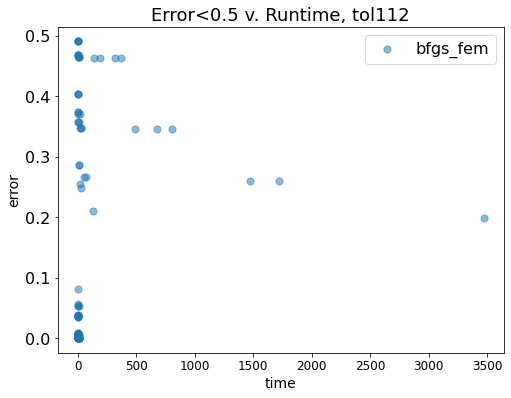

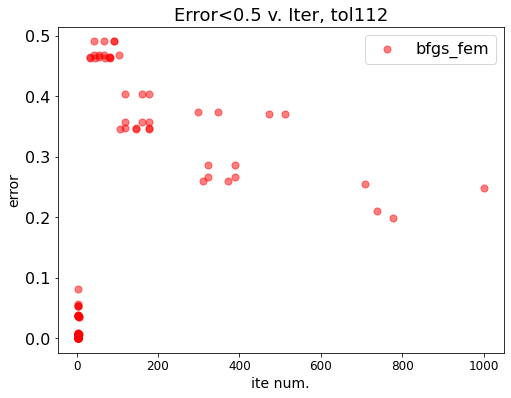

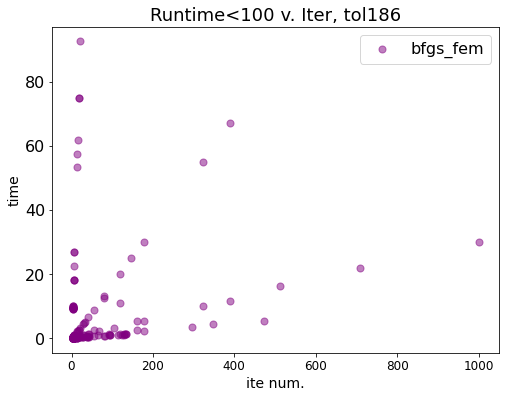

In [116]:
thres = 0.5  ##error threshold for plots
timethres = 100  ##runtime threshold for plots
size = [8,6]  ##plot size

df_bf_fem = pd.read_csv("bf_fem_df.csv") 
df_bf_fem2 = df_bf_fem[df_bf_fem['err'] < thres]
text = "Error<{} v. Runtime, tol{}".format(thres,len(df_bf_fem2.err))
plot_func(size, [df_bf_fem2.time], [df_bf_fem2.err], islog = False, title = text,
          xlab = "time", ylab = "error", leg = ["bfgs_fem"], scatter = True)
text2 = "Error<{} v. Iter, tol{}".format(thres,len(df_bf_fem2.err))
plot_func(size, [df_bf_fem2.ite], [df_bf_fem2.err], islog = False, title = text2,
          xlab = "ite num.", ylab = "error", leg = ["bfgs_fem"], scatter = True, 
          c = 'red')

df_bf_fem3 = df_bf_fem[df_bf_fem['time'] < timethres]
text3 = "Runtime<{} v. Iter, tol{}".format(timethres,len(df_bf_fem3.time))
plot_func(size, [df_bf_fem3.ite], [df_bf_fem3.time], islog = False, title = text3,
          xlab = "ite num.", ylab = "time", leg = ["bfgs_fem"], scatter = True, 
          c = 'purple')

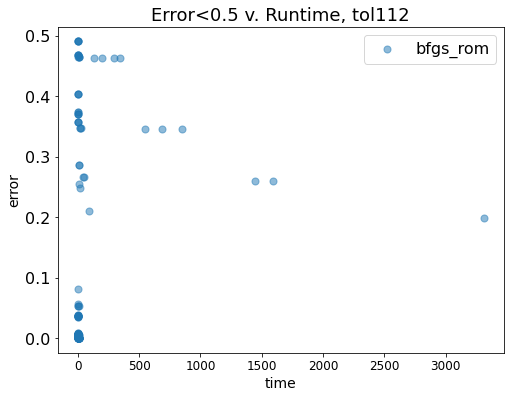

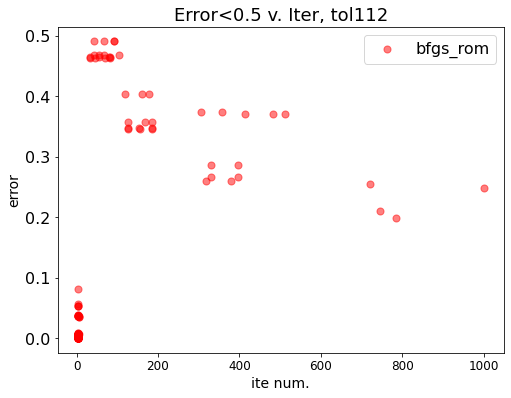

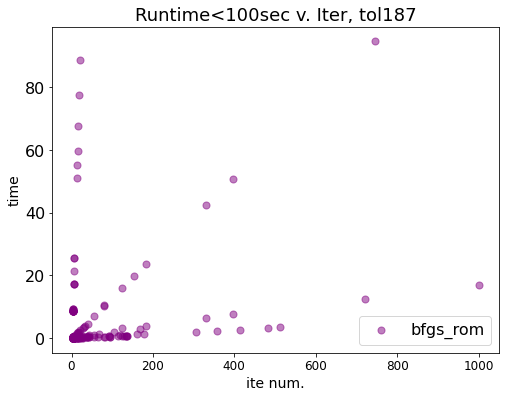

In [115]:
df_bf_rom = pd.read_csv("bf_rom_df.csv") 
df_bf_rom2 = df_bf_rom[df_bf_rom['err'] < thres]
text = "Error<{} v. Runtime, tol{}".format(thres,len(df_bf_rom2.err))
plot_func(size, [df_bf_rom2.time], [df_bf_rom2.err], islog = False, title = text,
              xlab = "time", ylab = "error", leg = ["bfgs_rom"], scatter = True)
text2 = "Error<{} v. Iter, tol{}".format(thres,len(df_bf_rom2.err))
plot_func(size, [df_bf_rom2.ite], [df_bf_rom2.err], islog = False, title = text2,
          xlab = "ite num.", ylab = "error", leg = ["bfgs_rom"], scatter = True, 
          c = 'red')

df_bf_rom3 = df_bf_rom[df_bf_rom['time'] < timethres]
text3 = "Runtime<{}sec v. Iter, tol{}".format(timethres,len(df_bf_rom3.time))
plot_func(size, [df_bf_rom3.ite], [df_bf_rom3.time], islog = False, title = text3,
          xlab = "ite num.", ylab = "time", leg = ["bfgs_rom"], scatter = True, 
          c = 'purple')

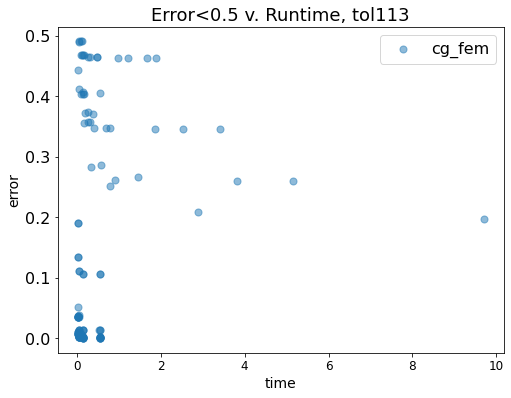

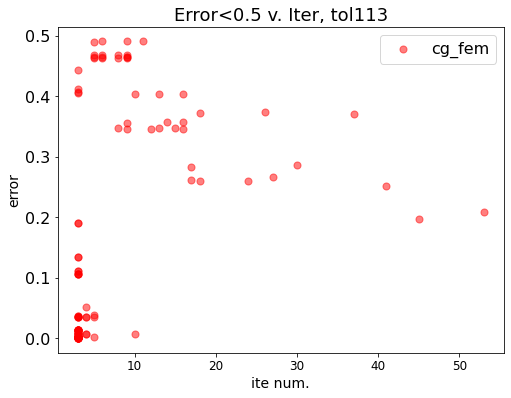

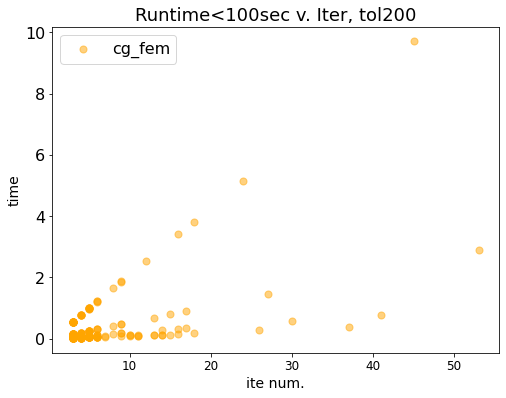

In [113]:
df_cg_fem = pd.read_csv("cg_fem_df.csv") 
df_cg_fem2 = df_cg_fem[df_cg_fem['err'] < thres]
text = "Error<{} v. Runtime, tol{}".format(thres,len(df_cg_fem2.err))
plot_func(size, [df_cg_fem2.time], [df_cg_fem2.err], islog = False, title = text,
              xlab = "time", ylab = "error", leg = ["cg_fem"], scatter = True)
text2 = "Error<{} v. Iter, tol{}".format(thres,len(df_cg_fem2.err))
plot_func(size, [df_cg_fem2.ite], [df_cg_fem2.err], islog = False, title = text2,
          xlab = "ite num.", ylab = "error", leg = ["cg_fem"], scatter = True, 
          c = 'red')

df_cg_fem3 = df_cg_fem[df_cg_fem['time'] < timethres]
text3 = "Runtime<{}sec v. Iter, tol{}".format(timethres,len(df_cg_fem3.time))
plot_func(size, [df_cg_fem3.ite], [df_cg_fem3.time], islog = False, title = text3,
          xlab = "ite num.", ylab = "time", leg = ["cg_fem"], scatter = True, 
          c = 'orange')

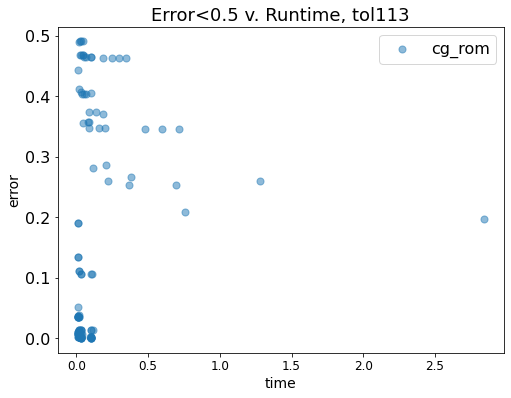

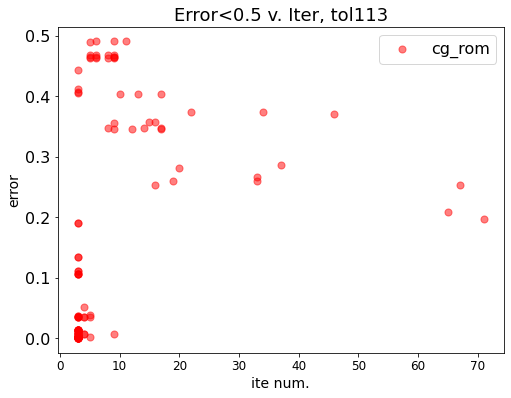

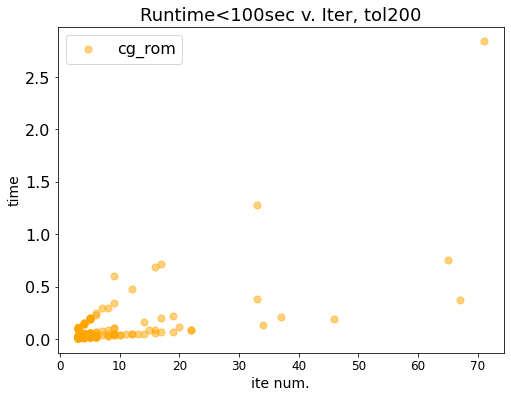

In [114]:
df_cg_rom = pd.read_csv("cg_rom_df.csv") 
df_cg_rom2 = df_cg_rom[df_cg_rom['err'] < thres]
text = "Error<{} v. Runtime, tol{}".format(thres,len(df_cg_rom2.err))
plot_func(size, [df_cg_rom2.time], [df_cg_rom2.err], islog = False, title = text,
              xlab = "time", ylab = "error", leg = ["cg_rom"], scatter = True)
text2 = "Error<{} v. Iter, tol{}".format(thres,len(df_cg_rom2.err))
plot_func(size, [df_cg_rom2.ite], [df_cg_rom2.err], islog = False, title = text2,
          xlab = "ite num.", ylab = "error", leg = ["cg_rom"], scatter = True, 
          c = 'red')

df_cg_rom3 = df_cg_rom[df_cg_rom['time'] < timethres]
text3 = "Runtime<{}sec v. Iter, tol{}".format(timethres,len(df_cg_rom3.time))
plot_func(size, [df_cg_rom3.ite], [df_cg_rom3.time], islog = False, title = text3,
          xlab = "ite num.", ylab = "time", leg = ["cg_rom"], scatter = True, 
          c = 'orange')